In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers

In [6]:
n_samples = 1000 ## Number of samples to use as a dataset.
val_ratio = 0.2 ## Percentage of the dataset that will be used for validation process.
test_ratio = 0.2 ## Percentage of the dataset that will be used for testing process.
tflite_model_name = "sine_model"
c_model_name = "sine_model"

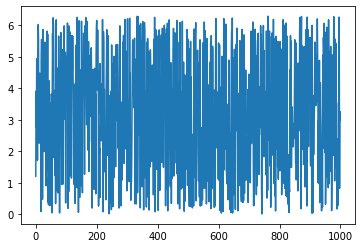

In [8]:
## Generate randoms samples.
np.random.seed(1234)
x_values = np.random.uniform(low = 0, high = (2 * math.pi), size = n_samples)
plt.plot(x_values) ## For validation.

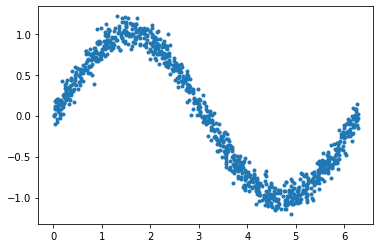

In [16]:
y_values = np.sin(x_values) + (0.1 * np.random.randn(x_values.shape[0]))
plt.plot(x_values, y_values, ".")

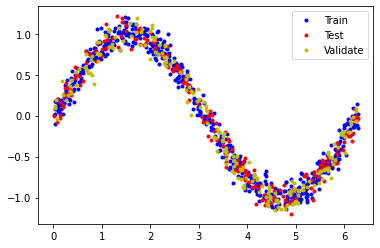

In [19]:
## Split the dataset into training, validation and test sets.
val_split = int(val_ratio * n_samples)
test_split = int(val_split + (test_ratio * n_samples))
x_val, x_test, x_train = np.split(x_values, [val_split, test_split])
y_val, y_test, y_train = np.split(y_values, [val_split, test_split])

## Check that our splits add up correctly.
assert(x_train.size + x_val.size + x_test.size) == n_samples

## Plot the sets for validation.
plt.plot(x_train, y_train, "b.", label = "Train")
plt.plot(x_test, y_test, "r.", label = "Test")
plt.plot(x_val, y_val, "y.", label = "Validate")
plt.legend()
plt.show()

In [20]:
## Create the model.
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation = "relu", input_shape = (1, )))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(1))

In [22]:
## View the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [23]:
## Add an optimizer, loss function and metrics to the model and compile it.
model.compile(optimizer = "rmsprop", loss = "mae", metrics = ["mae"])

In [29]:
history = model.fit(x_train,
                    y_train,
                    epochs = 1000,
                    batch_size = 100,
                    validation_data = (x_val, y_val)
                   )

Epoch 1/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2874 - mae: 0.2874 - val_loss: 0.3216 - val_mae: 0.3216
Epoch 2/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2900 - mae: 0.2900 - val_loss: 0.3267 - val_mae: 0.3267
Epoch 3/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2880 - mae: 0.2880 - val_loss: 0.3213 - val_mae: 0.3213
Epoch 4/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2886 - mae: 0.2886 - val_loss: 0.3244 - val_mae: 0.3244
Epoch 5/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2896 - mae: 0.2896 - val_loss: 0.3305 - val_mae: 0.3305
Epoch 6/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2883 - mae: 0.2883 - val_loss: 0.3255 - val_mae: 0.3255
Epoch 7/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2898 - mae: 0.2898 - val_loss: 0.3250 - val_mae: 0.3250
Epoch 8/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2889 - mae: 0.28

6/6 [==============================] - 0s 3ms/step - loss: 0.2898 - mae: 0.2898 - val_loss: 0.3216 - val_mae: 0.3216
Epoch 64/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2878 - mae: 0.2878 - val_loss: 0.3267 - val_mae: 0.3267
Epoch 65/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2910 - mae: 0.2910 - val_loss: 0.3296 - val_mae: 0.3296
Epoch 66/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2873 - mae: 0.2873 - val_loss: 0.3228 - val_mae: 0.3228
Epoch 67/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2899 - mae: 0.2899 - val_loss: 0.3230 - val_mae: 0.3230
Epoch 68/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2910 - mae: 0.2910 - val_loss: 0.3229 - val_mae: 0.3229
Epoch 69/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2900 - mae: 0.2900 - val_loss: 0.3243 - val_mae: 0.3243
Epoch 70/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2876 - mae: 0.2876 - v

6/6 [==============================] - 0s 2ms/step - loss: 0.2884 - mae: 0.2884 - val_loss: 0.3250 - val_mae: 0.3250
Epoch 126/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2918 - mae: 0.2918 - val_loss: 0.3260 - val_mae: 0.3260
Epoch 127/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2885 - mae: 0.2885 - val_loss: 0.3249 - val_mae: 0.3249
Epoch 128/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2881 - mae: 0.2881 - val_loss: 0.3231 - val_mae: 0.3231
Epoch 129/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2913 - mae: 0.2913 - val_loss: 0.3230 - val_mae: 0.3230
Epoch 130/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2876 - mae: 0.2876 - val_loss: 0.3227 - val_mae: 0.3227
Epoch 131/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2926 - mae: 0.2926 - val_loss: 0.3232 - val_mae: 0.3232
Epoch 132/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2876 - mae: 0.2

6/6 [==============================] - 0s 2ms/step - loss: 0.2886 - mae: 0.2886 - val_loss: 0.3288 - val_mae: 0.3288
Epoch 188/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2889 - mae: 0.2889 - val_loss: 0.3326 - val_mae: 0.3326
Epoch 189/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2879 - mae: 0.2879 - val_loss: 0.3284 - val_mae: 0.3284
Epoch 190/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2898 - mae: 0.2898 - val_loss: 0.3262 - val_mae: 0.3262
Epoch 191/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2889 - mae: 0.2889 - val_loss: 0.3212 - val_mae: 0.3212
Epoch 192/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2893 - mae: 0.2893 - val_loss: 0.3262 - val_mae: 0.3262
Epoch 193/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2872 - mae: 0.2872 - val_loss: 0.3219 - val_mae: 0.3219
Epoch 194/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2901 - mae: 0.2

6/6 [==============================] - 0s 3ms/step - loss: 0.2875 - mae: 0.2875 - val_loss: 0.3276 - val_mae: 0.3276
Epoch 250/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2894 - mae: 0.2894 - val_loss: 0.3256 - val_mae: 0.3256
Epoch 251/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2877 - mae: 0.2877 - val_loss: 0.3257 - val_mae: 0.3257
Epoch 252/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2887 - mae: 0.2887 - val_loss: 0.3274 - val_mae: 0.3274
Epoch 253/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2891 - mae: 0.2891 - val_loss: 0.3260 - val_mae: 0.3260
Epoch 254/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2897 - mae: 0.2897 - val_loss: 0.3295 - val_mae: 0.3295
Epoch 255/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2902 - mae: 0.2902 - val_loss: 0.3231 - val_mae: 0.3231
Epoch 256/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2878 - mae: 0.2

6/6 [==============================] - 0s 2ms/step - loss: 0.2863 - mae: 0.2863 - val_loss: 0.3241 - val_mae: 0.3241
Epoch 312/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2876 - mae: 0.2876 - val_loss: 0.3239 - val_mae: 0.3239
Epoch 313/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2863 - mae: 0.2863 - val_loss: 0.3224 - val_mae: 0.3224
Epoch 314/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2882 - mae: 0.2882 - val_loss: 0.3263 - val_mae: 0.3263
Epoch 315/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2876 - mae: 0.2876 - val_loss: 0.3196 - val_mae: 0.3196
Epoch 316/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2881 - mae: 0.2881 - val_loss: 0.3245 - val_mae: 0.3245
Epoch 317/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2862 - mae: 0.2862 - val_loss: 0.3205 - val_mae: 0.3205
Epoch 318/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2895 - mae: 0.2

6/6 [==============================] - 0s 3ms/step - loss: 0.2787 - mae: 0.2787 - val_loss: 0.3099 - val_mae: 0.3099
Epoch 374/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2774 - mae: 0.2774 - val_loss: 0.3132 - val_mae: 0.3132
Epoch 375/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2761 - mae: 0.2761 - val_loss: 0.3193 - val_mae: 0.3193
Epoch 376/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2767 - mae: 0.2767 - val_loss: 0.3202 - val_mae: 0.3202
Epoch 377/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2756 - mae: 0.2756 - val_loss: 0.3182 - val_mae: 0.3182
Epoch 378/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2763 - mae: 0.2763 - val_loss: 0.3173 - val_mae: 0.3173
Epoch 379/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2747 - mae: 0.2747 - val_loss: 0.3077 - val_mae: 0.3077
Epoch 380/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2781 - mae: 0.2

6/6 [==============================] - 0s 3ms/step - loss: 0.2575 - mae: 0.2575 - val_loss: 0.2886 - val_mae: 0.2886
Epoch 436/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2569 - mae: 0.2569 - val_loss: 0.2876 - val_mae: 0.2876
Epoch 437/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2591 - mae: 0.2591 - val_loss: 0.2890 - val_mae: 0.2890
Epoch 438/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2560 - mae: 0.2560 - val_loss: 0.2874 - val_mae: 0.2874
Epoch 439/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2574 - mae: 0.2574 - val_loss: 0.2877 - val_mae: 0.2877
Epoch 440/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2563 - mae: 0.2563 - val_loss: 0.2860 - val_mae: 0.2860
Epoch 441/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2545 - mae: 0.2545 - val_loss: 0.2876 - val_mae: 0.2876
Epoch 442/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2552 - mae: 0.2

6/6 [==============================] - 0s 2ms/step - loss: 0.2258 - mae: 0.2258 - val_loss: 0.2603 - val_mae: 0.2603
Epoch 498/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2273 - mae: 0.2273 - val_loss: 0.2582 - val_mae: 0.2582
Epoch 499/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2253 - mae: 0.2253 - val_loss: 0.2545 - val_mae: 0.2545
Epoch 500/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2250 - mae: 0.2250 - val_loss: 0.2561 - val_mae: 0.2561
Epoch 501/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2243 - mae: 0.2243 - val_loss: 0.2556 - val_mae: 0.2556
Epoch 502/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2241 - mae: 0.2241 - val_loss: 0.2575 - val_mae: 0.2575
Epoch 503/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2230 - mae: 0.2230 - val_loss: 0.2578 - val_mae: 0.2578
Epoch 504/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2223 - mae: 0.2

6/6 [==============================] - 0s 2ms/step - loss: 0.1907 - mae: 0.1907 - val_loss: 0.2197 - val_mae: 0.2197
Epoch 560/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1903 - mae: 0.1903 - val_loss: 0.2246 - val_mae: 0.2246
Epoch 561/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.1920 - mae: 0.1920 - val_loss: 0.2186 - val_mae: 0.2186
Epoch 562/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1887 - mae: 0.1887 - val_loss: 0.2165 - val_mae: 0.2165
Epoch 563/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1886 - mae: 0.1886 - val_loss: 0.2157 - val_mae: 0.2157
Epoch 564/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1876 - mae: 0.1876 - val_loss: 0.2152 - val_mae: 0.2152
Epoch 565/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1887 - mae: 0.1887 - val_loss: 0.2136 - val_mae: 0.2136
Epoch 566/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1865 - mae: 0.1

6/6 [==============================] - 0s 2ms/step - loss: 0.1554 - mae: 0.1554 - val_loss: 0.1829 - val_mae: 0.1829
Epoch 622/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1562 - mae: 0.1562 - val_loss: 0.1795 - val_mae: 0.1795
Epoch 623/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1567 - mae: 0.1567 - val_loss: 0.1807 - val_mae: 0.1807
Epoch 624/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1561 - mae: 0.1561 - val_loss: 0.1804 - val_mae: 0.1804
Epoch 625/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1572 - mae: 0.1572 - val_loss: 0.1801 - val_mae: 0.1801
Epoch 626/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1532 - mae: 0.1532 - val_loss: 0.1767 - val_mae: 0.1767
Epoch 627/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1540 - mae: 0.1540 - val_loss: 0.1769 - val_mae: 0.1769
Epoch 628/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1537 - mae: 0.1

6/6 [==============================] - 0s 2ms/step - loss: 0.1280 - mae: 0.1280 - val_loss: 0.1501 - val_mae: 0.1501
Epoch 684/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1287 - mae: 0.1287 - val_loss: 0.1504 - val_mae: 0.1504
Epoch 685/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1277 - mae: 0.1277 - val_loss: 0.1501 - val_mae: 0.1501
Epoch 686/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1270 - mae: 0.1270 - val_loss: 0.1508 - val_mae: 0.1508
Epoch 687/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1277 - mae: 0.1277 - val_loss: 0.1496 - val_mae: 0.1496
Epoch 688/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1267 - mae: 0.1267 - val_loss: 0.1529 - val_mae: 0.1529
Epoch 689/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1265 - mae: 0.1265 - val_loss: 0.1485 - val_mae: 0.1485
Epoch 690/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1278 - mae: 0.1

6/6 [==============================] - 0s 2ms/step - loss: 0.1013 - mae: 0.1013 - val_loss: 0.1215 - val_mae: 0.1215
Epoch 746/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1057 - mae: 0.1057 - val_loss: 0.1206 - val_mae: 0.1206
Epoch 747/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.1017 - mae: 0.1017 - val_loss: 0.1194 - val_mae: 0.1194
Epoch 748/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1013 - mae: 0.1013 - val_loss: 0.1255 - val_mae: 0.1255
Epoch 749/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1019 - mae: 0.1019 - val_loss: 0.1271 - val_mae: 0.1271
Epoch 750/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1011 - mae: 0.1011 - val_loss: 0.1179 - val_mae: 0.1179
Epoch 751/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.1003 - mae: 0.1003 - val_loss: 0.1173 - val_mae: 0.1173
Epoch 752/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1035 - mae: 0.1

6/6 [==============================] - 0s 2ms/step - loss: 0.0920 - mae: 0.0920 - val_loss: 0.1020 - val_mae: 0.1020
Epoch 808/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0908 - mae: 0.0908 - val_loss: 0.1052 - val_mae: 0.1052
Epoch 809/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0878 - mae: 0.0878 - val_loss: 0.1022 - val_mae: 0.1022
Epoch 810/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0910 - mae: 0.0910 - val_loss: 0.1018 - val_mae: 0.1018
Epoch 811/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0913 - mae: 0.0913 - val_loss: 0.1019 - val_mae: 0.1019
Epoch 812/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0921 - mae: 0.0921 - val_loss: 0.1054 - val_mae: 0.1054
Epoch 813/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0936 - mae: 0.0936 - val_loss: 0.0998 - val_mae: 0.0998
Epoch 814/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0888 - mae: 0.0

6/6 [==============================] - 0s 2ms/step - loss: 0.0843 - mae: 0.0843 - val_loss: 0.0952 - val_mae: 0.0952
Epoch 870/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0871 - mae: 0.0871 - val_loss: 0.0974 - val_mae: 0.0974
Epoch 871/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0814 - mae: 0.0814 - val_loss: 0.0953 - val_mae: 0.0953
Epoch 872/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0854 - mae: 0.0854 - val_loss: 0.0977 - val_mae: 0.0977
Epoch 873/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0889 - mae: 0.0889 - val_loss: 0.0942 - val_mae: 0.0942
Epoch 874/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0834 - mae: 0.0834 - val_loss: 0.0961 - val_mae: 0.0961
Epoch 875/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0877 - mae: 0.0877 - val_loss: 0.0963 - val_mae: 0.0963
Epoch 876/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0864 - mae: 0.0

6/6 [==============================] - 0s 3ms/step - loss: 0.0836 - mae: 0.0836 - val_loss: 0.0924 - val_mae: 0.0924
Epoch 932/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0795 - mae: 0.0795 - val_loss: 0.0921 - val_mae: 0.0921
Epoch 933/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0885 - mae: 0.0885 - val_loss: 0.0938 - val_mae: 0.0938
Epoch 934/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0826 - mae: 0.0826 - val_loss: 0.0975 - val_mae: 0.0975
Epoch 935/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0825 - mae: 0.0825 - val_loss: 0.0927 - val_mae: 0.0927
Epoch 936/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0828 - mae: 0.0828 - val_loss: 0.0974 - val_mae: 0.0974
Epoch 937/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0842 - mae: 0.0842 - val_loss: 0.0922 - val_mae: 0.0922
Epoch 938/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0866 - mae: 0.0

6/6 [==============================] - 0s 3ms/step - loss: 0.0812 - mae: 0.0812 - val_loss: 0.0926 - val_mae: 0.0926
Epoch 994/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0835 - mae: 0.0835 - val_loss: 0.0910 - val_mae: 0.0910
Epoch 995/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0827 - mae: 0.0827 - val_loss: 0.0928 - val_mae: 0.0928
Epoch 996/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0828 - mae: 0.0828 - val_loss: 0.0968 - val_mae: 0.0968
Epoch 997/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0797 - mae: 0.0797 - val_loss: 0.0936 - val_mae: 0.0936
Epoch 998/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0861 - mae: 0.0861 - val_loss: 0.0917 - val_mae: 0.0917
Epoch 999/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0797 - mae: 0.0797 - val_loss: 0.1188 - val_mae: 0.1188
Epoch 1000/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0853 - mae: 0.

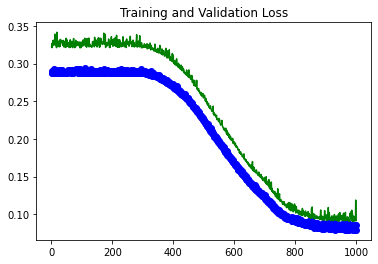

In [30]:
## Plot the training history.
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "g", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.show()

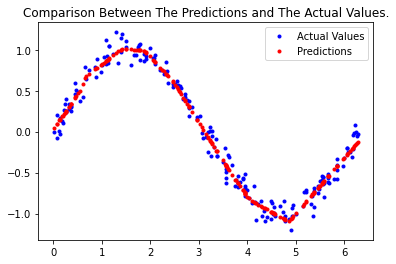

In [31]:
## Plot predicitons agains actual values.
predictions = model. predict(x_test)

plt.clf()
plt.title("Comparison Between The Predictions and The Actual Values.")
plt.plot(x_test, y_test, "b.", label = "Actual Values")
plt.plot(x_test, predictions, "r.", label = "Predictions")
plt.legend()
plt.show()